<a href="https://colab.research.google.com/github/xpecon00/MPA-MLF/blob/main/FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLF - FINAL PROJECT


1/ IMPORT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import train_test_split

from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adagrad, Adam, AdamW
from keras.datasets import cifar10
from keras.utils import to_categorical
from tensorflow.keras.regularizers import l2

import cv2
import os

from PIL import Image
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

2/ DATASET

2.1/ Loading dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def load_images_from_folder(folder, n_img: int):
    images = []
    for i in range(n_img+1):
        img_path = os.path.join(folder, f"img_{i}.png")
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                images.append(img)
    return images

2.2/ Examination

In [ ]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(20 + 51*id_label, 55, label)
  plt.axis('off')
  plt.show()

2.3/ Separate RGB colors from array of images

In [ ]:
def separate_rgb_from_images(images_array):
    red_channel = images_array[:, :, :, 0]                                      # Extract Red channel
    green_channel = images_array[:, :, :, 1]                                    # Extract Green channel
    blue_channel = images_array[:, :, :, 2]                                     # Extract Blue channel

    return red_channel, green_channel, blue_channel

2.4/ Loading and saving the data to our driver in .np format

In [ ]:
X_train =load_images_from_folder("/content/drive/MyDrive/Final_project_Data/train_data_unlabeled",16182)
X_test =load_images_from_folder("/content/drive/MyDrive/Final_project_Data/test_data_unlabeled",4796)

In [ ]:
np.save('/content/drive/MyDrive/Final_project_Data/X_test_data.npy', X_test)
np.save('/content/drive/MyDrive/Final_project_Data/X_train_data.npy', X_train)

In [ ]:
X_train = np.load('/content/drive/MyDrive/Final_project_Data/X_train_data.npy')
X_test = np.load('/content/drive/MyDrive/Final_project_Data/X_test_data.npy')
y_train = pd.read_csv('/content/drive/MyDrive/Final_project_Data/y_train.csv')
y_train = y_train['target']
y_train

0        0
1        1
2        0
3        2
4        2
        ..
16177    1
16178    3
16179    2
16180    0
16181    1
Name: target, Length: 16182, dtype: int64

2.4/ Display some random images from loaded dataset

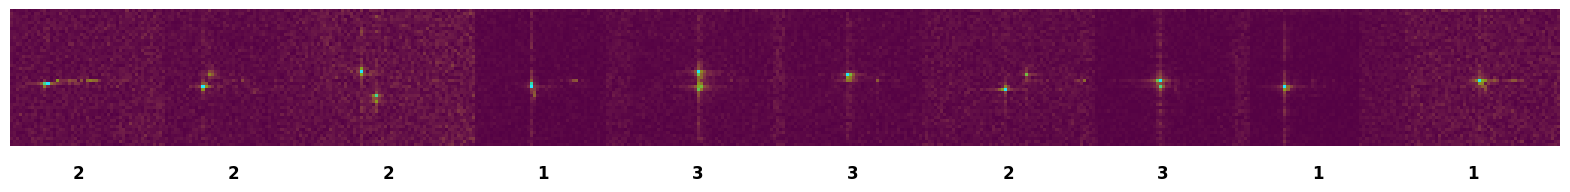

In [ ]:
display_random_images(X_train, y_train)

In [ ]:
red_channel, green_channel, blue_channel = separate_rgb_from_images(X_train)

<Figure size 640x480 with 0 Axes>

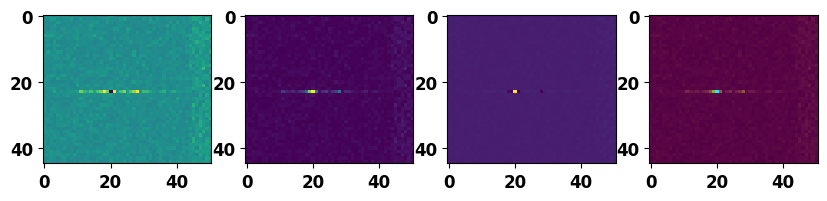

In [ ]:
plt.figure()
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))
axs[0].imshow(red_channel[0])
axs[1].imshow(green_channel[0])
axs[2].imshow(blue_channel[0])
axs[3].imshow(X_train[0])
plt.show()

3/ DATA PREPROCESSING

In [ ]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
X_train_exp = np.expand_dims(X_train_split, -1)
X_train_scaled = X_train_exp.astype('float32') / 255.0
y_train_encoded = to_categorical(y_train_split, num_classes=4)

3.1/ Creating suitable structure of the model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(45, 51, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))


3.2/ Choosing the right optimalizer and compiling model

In [ ]:
loss = 'categorical_crossentropy'
metrics = 'accuracy'
learning_rate = 0.001

optimizer = Adam(learning_rate = learning_rate)
model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 43, 49, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 41, 47, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 20, 23, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 21, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 9, 10, 128)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 11520)             0

4/ MODEL TRAINING

In [ ]:
history = model.fit(X_train_scaled, y_train_encoded, epochs=60, batch_size=128, validation_split = 0.2)

Epoch 1/60
81/81 [==============================] - 11s 46ms/step - loss: 1.0049 - accuracy: 0.6278 - val_loss: 0.6683 - val_accuracy: 0.7748
Epoch 2/60
81/81 [==============================] - 2s 25ms/step - loss: 0.5383 - accuracy: 0.8245 - val_loss: 0.4192 - val_accuracy: 0.8667
Epoch 3/60
81/81 [==============================] - 2s 27ms/step - loss: 0.3995 - accuracy: 0.8757 - val_loss: 0.3911 - val_accuracy: 0.8725
Epoch 4/60
81/81 [==============================] - 2s 28ms/step - loss: 0.3577 - accuracy: 0.8965 - val_loss: 0.3457 - val_accuracy: 0.9135
Epoch 5/60
81/81 [==============================] - 2s 25ms/step - loss: 0.3297 - accuracy: 0.9044 - val_loss: 0.3203 - val_accuracy: 0.9162
Epoch 6/60
81/81 [==============================] - 2s 27ms/step - loss: 0.2937 - accuracy: 0.9172 - val_loss: 0.2677 - val_accuracy: 0.9351
Epoch 7/60
81/81 [==============================] - 2s 26ms/step - loss: 0.2803 - accuracy: 0.9222 - val_loss: 0.2683 - val_accuracy: 0.9305
Epoch 8/60
8

4.1/ Model Evaluation

In [ ]:
X_test_exp = np.expand_dims(X_test_split, -1)
X_test_preprocessed = X_test_exp.astype('float32') / 255.0
y_test_encoded = to_categorical(y_test_split, num_classes=4)

score = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

Test loss: 0.1357877552509308
Test accuracy: 97.96107411384583 %


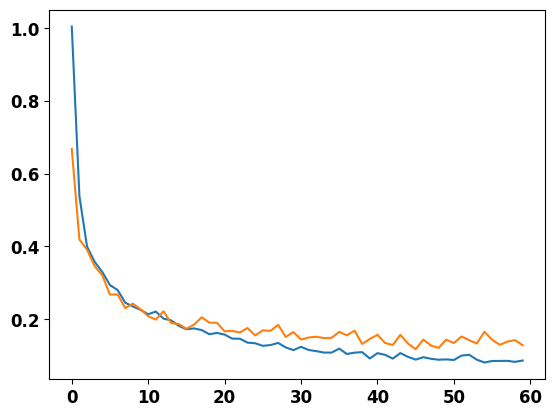

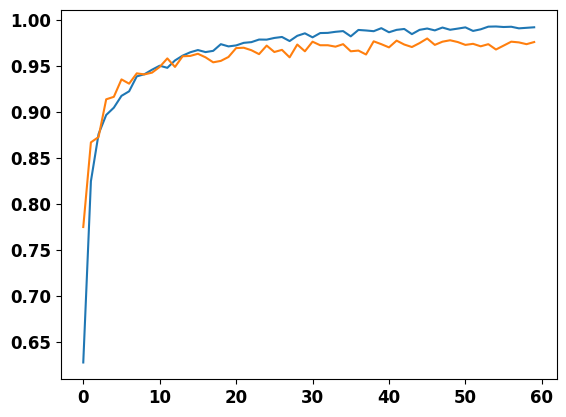

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

4.2/ Creating .csv subject for Keggle testing

In [ ]:
red_channel2, green_channel2, blue_channel2 = separate_rgb_from_images(X_test)

In [ ]:
y_test_pred = model.predict(X_test)
y_test_labels = np.argmax(y_test_pred, axis=1)
y_test = pd.DataFrame({'id': range(len(y_test_labels)), 'target': y_test_labels})
y_test.to_csv('/content/drive/MyDrive/Final_project_Data/y_test.csv', index=False)

150/150 [==============================] - 0s 3ms/step


5/ TUNNING (all methods we tried to improve the accuracy of our algorithm)

*   Various optimizer functions - Adam, AdamW, SGD, Adagrad
*   Model tuning - adding a layer, changing the number of neurons in layers, dropout possibilities, regularizer L2, various activation functions - relu, gelu, sigmoid; softmax in the output layer
*   Number of epochs, batch size changing